<a href="https://colab.research.google.com/github/codyub/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch5_1~5_(4_%EC%A0%9C%EC%99%B8)_pg_290~319(303~310_%EC%A0%9C%EC%99%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05 회귀

- 회귀분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- 여러개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 독립변수: 피처
- 종속변수: 결정 값
- 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수**를 찾아내는 것
- 회귀는 회귀계수의 선형/비선형 여부, 독립변수의 개수, 종속 변수의 개수에 따라 여러 가지 유형으로 나눌 수 있음
- 회귀계수가 선형이나 아니냐에 따라 선형과 비선형 회귀로 나눌 수 있음.
- 독립변수의 개수에 따라 단일 회귀, 다중 회귀로 나뉨

- 지도학습: 분류, 회귀
- 분류: 예측값이 카테고리와 같은 이산형 클래스 값
- 회귀: 연속형 숫자 값
- 선형회귀는 실제 값과 예측값의 차이(오류의 제곱값)를 최소화하는 직선형 회귀선을 최적화 하는 방식
- 규제 방법에 따라 분류: 일반적인 선형 회귀의 과적합 문제를 해결 하기 위해 회귀 계수에 패널티 값을 적용하는 것


- 대표적인 선형 회귀 모델
> - 일반 선형 회귀: 예측값과 실제값의 RSS를 최소화 할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
> - 릿지: 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델. 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델
> - 라쏘: 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식. 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것. 
> - 엘라스틱넷: L2,L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정
> - 로지스틱 회귀: 사실 분류에 사용되는 선형 모델. 매우 강력한 분류 알고리즘. 일반적으로 이진 분류만이 아닌 희소 영역의 분류,예) 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임

# 단순 선형 회귀를 통한 회귀 이해
- 독립 변수도 하나, 종속 변수도 하나인 선형 회귀
- 실제 값과 회귀 모델의 차이에 따른 오류 값을 잔차라고 부름
- 최적의 회귀 모델은 잔차의 합이 최소가 되는 모델을 만드는 것
- MAE: 잔차의 절댓값을 취해서 더하는 방법
- RSS: 오류 값의 제곱을 구해서 더하는 방식 <- 일반적으로 사용함. 
- 회귀에서 RSS는 비용이며, 회귀 계수로 구성되는 RSS를 비용 함수라고 함.
- 머신 러닝 회귀 알고리즘은 데이터를 계속 학습하면서 비용 함수가 반환하는 값을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것
- 비용 함수 = 손실 함수

# 비용 최소화 하기: 경사 하강법 소개
- 비용함수가 최소가 되는 w 파라미터를 구하는 방법은?
- 경사 하강법은 고차원 방정식에 대한 문제를 해결해 주면서 비용함수 RSS를 최소화 하는 방법을 직관적으로 제공하는 방식
- 데이터를 기반으로 알고리즘이 스스로 학습한다는 머신러닝의 개념을 가능하게 만들어준 방법
- 점진적인 반복 계산을 통해 w 파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 w 파라미터를 구하는 방식
- 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 w 파라미터를 지속해 보정해 나감
-오류를 감소시키는 방향으로 w 값을 계속 업데이트 하다가 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 w 값을 최적 파라미터로 반환
- 최초 w에서 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트. 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 w를 반환

# 경사하강법의 일반적인 프로세스
1. w1,w0을 임의의 값으로 설정하고 첫 비용 함수의 값을 계산
2. w1,w0을 업데이트 한 후 다시 비용 함수의 값을 계산함
3. 비용 함수의 값이 감소했으면 다시 step2를 반복함. 더 이상 비용 함수의 값이 감소하지 않으면 그때의 w1,w0을 구하고 반복을 중지함. 

# 경사 하강법을 파이썬 코드로 구현해보기
- y = 4x + 6

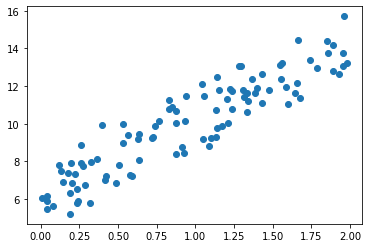

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y = 4X +6을 근사 (w1=4, w0=6).임의의 값은 노이즈를 위해 만듦
X = 2*np.random.rand(100,1)
y = 6+4 * X +np.random.randn(100,1)

#X,y데이터 세트 산점도로 시각화
plt.scatter(X,y)

- 데이터는 y=4x+6을 중심으로 무작위로 퍼져 있음

# 비용 함수 계산하기

In [3]:
def get_cost(y,y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

# 경사 하강법 구현하기: gradient_descent() 함수 생성
- w1,w0을 모두 0으로 초기화 한 뒤, iters 개수만큼 반복하면서 w1,w0을 업데이트
- gradient_descent()는 위에서 무작위로 생성한 X와 y를 입력 받는데, X와 y모두 넘파이.
- 넘파이 행렬에 W를 업데이트 하려면 선형대수 지식이 필요

# get_weight_update() 함수
- 입력 배열 x값에 대한 예측 배열 y_pred는 np.dot(X,w1.T) + w0으로 구함

In [4]:
# w1과 w0를 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N = len(y)
  #먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred =np.dot(X, w1.T) + w0
  diff = y-y_pred

  # w0_update를 dot행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  # w1과 w0을 업데이트할 w1_update와 w0_update계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

# get_weight_updates()을 결사 하강 방식으로 반복 수행
- w1,w0을 업데이트 하는 함수인 gradient_descent_steps() 함수 생성

In [5]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함.
def gradient_descent_steps(X,y, iters=10000):
  # w0와 w1을 모두 0으로 초기화
  w0= np.zeros((1,1))
  w1= np.zeros((1,1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_update 호출해 w1,w0업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0,X,y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1,w0

# gradient_descent_steps()를 호출해 w1,w0을 구하기 
- 최종 예측 값과 실제값의 RSS 차이를 계산하는 get_cost() 함수를 생성하고 이를 이용해 경사 하강법의 예측 오류도 계산

In [6]:
def get_cost(y,y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1,w0 = gradient_descent_steps(X,y,iters=10000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]* X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w1:3.968 w0:6.222
Gradient Descent Total Cost : 0.9924


# y_pred에 기반해 회귀선 그리기

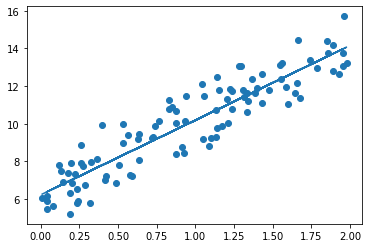

In [7]:
plt.scatter(X,y)
plt.plot(X,y_pred)

- 경사하강법은 일반적으로 시간이 오래 걸린다는 단점
- 때문에, 대부분 확률적 경사 하강법을 이용함. 
- 확률적 경사 하강법은 전체 입력 데이터로 w가 업데이트 되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트 되는 값을 계산하므로, 경사 하강법에 비해서 빠른 속도 보장.

# (미니 배치) 확률적 경사 하강법을 stochastic_gradient_descent_steps() 함수로 구현
- 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update를 계산하는 부분만 차이가 있음. 

In [8]:
def stochastic_gradient_descent_steps(X,y,batch_size = 10 , iters=1000):
  w0= np.zeros((1,1))
  w1= np.zeros((1,1))
  prev_cost = 100000
  iter_index= 0

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
  return w1, w0

# w1, w0 및 예측 오류 비용을 계산

In [9]:
w1,w0 =  stochastic_gradient_descent_steps(X,y, iters=1000)
print("w1:",round(w1[0,0],3), "w0:",round(w0[0,0],3))
y_pred = w1[0,0] + X + w0
print('Stochastic Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost : 5.2576


- 미니 배치 확률적 경사 하강법과 경사 하강법에 큰 차이를 보이지는 않음.

# 다항 회귀와 과(대)적합/과소적합 이해

# 다항 회귀 이해
- 일차 방정식의 형태로 표현된 회귀만 존재하지 않음.
- 다항 회귀는 선형 회귀임. 회귀에서 선형 회귀/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관.
- 사이킷런은 다항회귀 클래스를 명시적으로 제공하지 않기 때문에 polynomialFeatures클래스를 통해 피처를 변환

# polynomialFeatures를 이용해 단항값[x1,x2]를 2차 다항값으로 [1,x1,x2,x1^2,x1x2,x2^2]로 변환

In [10]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2x2행렬 생성
X= np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처 : \n',X)

# degree= 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 반환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수 피처 : \n", poly_ftr)

일차 단항식 계수 피처 : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


# polynomial_func(): 3차 다항 계수 피처 값이 입력되면 결정 값을 반환하는 함수
- 3차 다항 계수를 사용해 3차 다항 회귀 함수식을 유도

In [11]:
def polynomial_func(X):
  y= 1+2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)
y=polynomial_func(X)
print("삼차 다항식 결정값 : \n",y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


# 일차 단항식 계수를 삼차 다항식 계수를 변환, 선형회귀에 적용해 다항 회귀로 구현

In [12]:
#3차 다항식 변환
poly_tfr = PolynomialFeatures(degree=3).fit_transform(X)
print("삼차 다항식 계수 feature:\n",poly_ftr)

from sklearn.linear_model import LinearRegression
# Lineaer Regression 에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model=LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수 \n',np.round(model.coef_, 2))
print('Polynomial 회귀 shape :',model.coef_.shape)

삼차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]
Polynomial 회귀 계수 
 [0.   1.94 1.94 3.87 5.81 7.74]
Polynomial 회귀 shape : (6,)


- 1차 단항식 계수 피처는 2개 였지만, 3차 다항식 변환 이후에는 다항식 계수 피처가 10개로 늘어남

# 사이킷런의 Pipeline객체를 이용해 한 번에 다항 회귀를 구현

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
   y=1+2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
   return y

# Pipeline 객체로 Streamline하게 polynomial featre 변환과 Linear Regression을 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear', LinearRegression())])

X=np.arange(4).reshape(2,2)
y=polynomial_func(X)

model= model.fit(X,y)
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


# 다항 회귀를 이용한 과소적합 및 과적합 이해
- 다항회귀는 피처의 직선적 관계가 아닌, 복잡한 다항 관계를 모델링 할 수 있음
- 다항식의 차수가 높아질수록 복잡한 피처 간의 관계까지 모델링 가능
- 하지만, 학습 데이터에 너무 많이 맞춘 학습이 이뤄져 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어짐
- 차수가 높아질수록 과적합의 문제가 크게 발생


# 다항회귀 과소적합/과적합 문제의 예

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples =30
X= np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y= true_fun(X) +np.random.randn(n_samples)*0.1

# 예측 결과를 비교할 다항식 차수를 1,4,15로 변경하면서 비교
1. 다항식 차수별로 학습
2. cross_val_score()로 MSE 값을 구해 차수별 예측 성능 평가
3. 0-1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선을 그림


Degree 1 회귀 계수는 [-1.61]입니다.
Degree 1 MSE는 0.4077289625098685입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.04320874987232072입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08]입니다.
Degree 15 MSE는 180526263.3177066입니다.


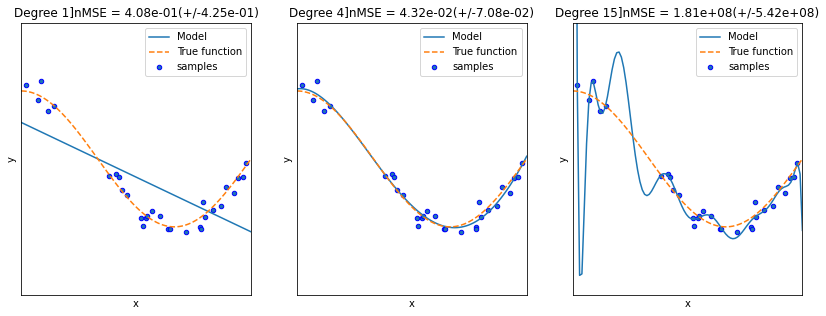

In [16]:
plt.figure(figsize =(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax= plt.subplot(1,len(degrees),i+1)
  plt.setp(ax, xticks=(),yticks=())

  # 개별 degree별로 polynomial 변환
  polynomial_features = PolynomialFeatures(degree= degrees[i], include_bias = False)
  linear_regression =LinearRegression()
  pipeline =Pipeline([("polynomial_features", polynomial_features), ("linear_regression",linear_regression )])
  pipeline.fit(X.reshape(-1,1),y)

  # 교차 검증으로 다항 회귀를 평가
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring ="neg_mean_squared_error",cv=10)
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀 계수 추출 
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients,2)))
  print('Degree {0} MSE는 {1}입니다.'.format(degrees[i], -1 * np.mean(scores)))

  # 0부터 1까지 테스트 데이터를 100개로 나눠 예측 수행
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 비교해볼게
  X_test = np.linspace(0,1,100)
  #예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]),label="Model")
  #실제 값 곡선
  plt.plot(X_test, true_fun(X_test),'--',label="True function")
  plt.scatter(X, y , edgecolor='b', s=20, label="samples")

  plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc = "best")
  plt.title("Degree {}]nMSE = {:.2e}(+/-{:.2e})".format(degrees[i], -scores.mean(),scores.std()))

- 실선 곡선은다항 회귀 예측 곡선이고 점선은 실제 데이터 세트의 코사인 곡선이다

- 맨 왼쪽의 DEGREE1예측 곡선은 단순한 직선으로서 단순선형회귀와 같다. -> 과소 적합

- 가운데 DEGRES4예측 곡선은 실제 데이터 세트와 유관한 모습(가장 뛰어난 MSE)

- 맨 오른쪽 DEGREE15예측 곡선은 mse값이 어처구니 없는 값. -> 과적합

- 좋은 예측 모델은 학습 데이터의 패턴을 잘 반영하면서 복잡하지 않은 균형 잡힌 모델을 의미함. 

# 편향 분산 트레이드 오프
- 지나치게 한 방향으로 치우친 경향이 있으며 이런 모델 = 고분산성을 가짐.

- 높은 평향/낮은 분산에서 과소적합되기 쉬우며 낮은 평향/높은 분산에서 과적합 되기 쉽다.

- 편향과 분산이 서로 프레이드 오프를 이루면서 오류 COST값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적